Group number 9

Group members
Jordan Bickelhaupt
Evelina Ramoskaite
Dave Sawh
Andrew Schiek

jordanrbickelhaupt@gmail.com
evelina.ramoskaite@gmail.com
devindrasawh@gmail.com
aschiek1@depaul.edu




In [ ]:
#load spacy for colab
 
!python -m spacy download en_core_web_lg
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp37-none-any.whl size=829180945 sha256=68d542ee4a7709323a70103dbf89e8b45de5c3338c2d97a9d809e38b52e8ee86
  Stored in directory: /tmp/pip-ephem-wheel-cache-hhoxomlz/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


#restart google colab runtime so the library loads

In [ ]:
!pip install scattertext


     |████████████████████████████████| 7.3MB 2.8MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9309 sha256=0a9412c35894ed0bfd95532403195ddea8de3bbce19a8058471efa3218a823de
  Stored in directory: /root/.cache/pip/wheels/37/db/d7/fe74f7cb8e5c3afed90fe6f4967c933a6f13d81ab6b3d3128c
Successfully built flashtext


In [ ]:
# ML Packages
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score 
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

import spacy
import en_core_web_sm
import  pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#adding spacy nlp object and stopwords 

from  spacy.lang.en.stop_words import STOP_WORDS
nlp = en_core_web_sm.load()
#nlp = spacy.load('en')

# To build a list of stop words for filtering
stopwords = list(STOP_WORDS)
print(stopwords)

['where', 'were', 'been', 'became', 'whole', 'against', 'beyond', 'name', 'ours', 'has', 'below', 'my', 'that', 'am', 'you', 'nothing', 'mine', 'often', 'or', 'beforehand', 'why', 'further', 'ten', 'empty', 'under', 'forty', 'amount', 'nobody', 'when', 'seemed', 'yourselves', 'now', 'least', 'whither', 'down', 'hence', 're', 'hereupon', 'about', 'already', 'else', 'becoming', 'much', 'get', 'various', 'otherwise', 'above', '’m', 'their', 'n’t', 'besides', 'this', 'over', 'how', 'himself', 'six', 'thus', 'one', 'it', 'with', 'however', 'serious', 'done', 'neither', 'all', '‘re', 'well', 'always', 'except', '’d', 'either', 'regarding', 'me', 'would', 'anything', 'nor', 'everyone', 'in', 'its', 'give', 'by', 'out', 'could', 'sometime', 'elsewhere', 'should', 'across', 'through', 'whereupon', 'while', 'whom', "'m", "'s", 'seems', 'see', 'whenever', '’ve', 'few', 'still', 'only', 'anyone', 'can', 'sometimes', 'whether', 'thence', 'everywhere', 'using', 'back', 'never', 'she', 'there', '‘m',

In [ ]:
#run file for googl.csv data 
from google.colab import files
uploaded = files.upload()

Saving rated_GOOGL.csv to rated_GOOGL.csv


In [ ]:
#create dataframe for googl.csv file

data = pd.read_csv('rated_GOOGL.csv')

In [ ]:
data.head()

,timestamp,tweet_text,all_hashtags,retweet_count,tweet_created_at,username,followers_count,target
0,5/3/2021 0:05,Today's Watchlist includes $GE $MFST $F $SL $M...,[],0,5/3/2021 0:05,microcapcompany,7491,neutral
1,5/3/2021 0:05,@1MainCapital I don’t think you can answer thi...,[],0,5/3/2021 0:05,retweettosender,1,negative
2,5/3/2021 0:16,China Says 33 Apps Break Rules in Gathering Us...,[],4,5/3/2021 0:16,smartertrader,48836,negative
3,5/3/2021 0:16,[Last 24 Hours] Stocks trending among elite #...,"['fintwit', 'investing', 'stocks', 'wallstreet...",0,5/3/2021 0:16,ffinapse,104,positive
4,5/3/2021 0:17,Mega cap stock and option trading model subscr...,[],0,5/3/2021 0:17,ProfectuSystems,422,neutral


In [ ]:
import re  #both patterns and strings to be searched can be Unicode strings (str) as well as 8-bit strings (bytes).

In [ ]:
#preprocess tweets

data.tweet_text =data.tweet_text.str.lower()  #tranform tweet col to lower case

#Remove handlers

data.tweet_text   = data.tweet_text.apply(lambda x:re.sub('@[^\s]+','',x))

# Remove URLS

data.tweet_text  = data.tweet_text.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove hashtags

data.tweet_text  = data.tweet_text.apply(lambda x:re.sub("#", "", x))

# Remove $

data.tweet_text  = data.tweet_text.apply(lambda x:re.sub("$", "", x))

#remove all single characters

data.tweet_text   = data.tweet_text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space

data.tweet_text   = data.tweet_text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))


In [ ]:
# Remove all the special characters

data.tweet_text  = data.tweet_text.apply(lambda x:' '.join(re.findall(r'\w+', x)))

In [ ]:
data.head()

,timestamp,tweet_text,all_hashtags,retweet_count,tweet_created_at,username,followers_count,target
0,5/3/2021 0:05,today s watchlist includes ge mfst f sl mmm di...,[],0,5/3/2021 0:05,microcapcompany,7491,neutral
1,5/3/2021 0:05,don t think you can answer this without substi...,[],0,5/3/2021 0:05,retweettosender,1,negative
2,5/3/2021 0:16,china says 33 apps break rules in gathering us...,[],4,5/3/2021 0:16,smartertrader,48836,negative
3,5/3/2021 0:16,last 24 hours stocks trending among elite fint...,"['fintwit', 'investing', 'stocks', 'wallstreet...",0,5/3/2021 0:16,ffinapse,104,positive
4,5/3/2021 0:17,mega cap stock and option trading model subscr...,[],0,5/3/2021 0:17,ProfectuSystems,422,neutral


In [ ]:
data.corr(method='pearson')
#followers doesnt matter if you get retweeted 

,retweet_count,followers_count
retweet_count,1.000000,0.724954
followers_count,0.724954,1.000000


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(28, 20))

<Figure size 2016x1440 with 0 Axes>

<Figure size 2016x1440 with 0 Axes>

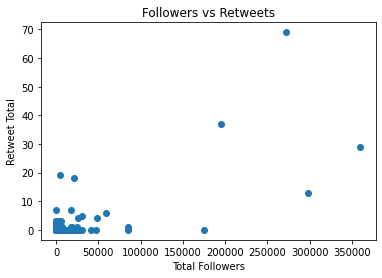

In [ ]:
plt.scatter(data.followers_count, data.retweet_count)
plt.title("Followers vs Retweets")
plt.xlabel("Total Followers")
plt.ylabel("Retweet Total")
plt.show()

In [ ]:
for val in range(len(data)):
  if data.retweet_count.iloc[val] > 0:
    data.retweet_count.iloc[val] = "Retweeted"
  else:
    data.retweet_count.iloc[val] = "NoRetweet" 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
data.head()

,timestamp,tweet_text,all_hashtags,retweet_count,tweet_created_at,username,followers_count,target
0,5/3/2021 0:05,today s watchlist includes ge mfst f sl mmm di...,[],NoRetweet,5/3/2021 0:05,microcapcompany,7491,neutral
1,5/3/2021 0:05,don t think you can answer this without substi...,[],NoRetweet,5/3/2021 0:05,retweettosender,1,negative
2,5/3/2021 0:16,china says 33 apps break rules in gathering us...,[],Retweeted,5/3/2021 0:16,smartertrader,48836,negative
3,5/3/2021 0:16,last 24 hours stocks trending among elite fint...,"['fintwit', 'investing', 'stocks', 'wallstreet...",NoRetweet,5/3/2021 0:16,ffinapse,104,positive
4,5/3/2021 0:17,mega cap stock and option trading model subscr...,[],NoRetweet,5/3/2021 0:17,ProfectuSystems,422,neutral


In [ ]:
#create scattertext visualization to see what terms may drive retweeted tweets vs not
import scattertext as st
import IPython

In [ ]:
pair1 = 'NoRetweet', 'Retweeted'
df_pair1 = data[data['retweet_count'].isin(pair1)]

In [ ]:
df_pair1['parsed'] = df_pair1.tweet_text.apply(nlp)

In [ ]:
# convert dataframe into Scattertext corpus
corpus_pair1 = st.CorpusFromParsedDocuments(df_pair1, category_col='retweet_count', parsed_col='parsed').build()

In [ ]:
# visualize term associations
html = st.produce_scattertext_explorer(corpus_pair1,category='Retweeted', category_name='RETWEETED', not_category_name='NOT RETWEETED',width_in_pixels=1000)
file_name = 'terms_pair1.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IPython.display.HTML(filename=file_name)

In [ ]:
import string
punctuations = string.punctuation
# Creating a Spacy Parser
from spacy.lang.en import English
parser = English()

In [ ]:
def my_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    return mytokens

In [ ]:
#Custom transformer using spaCy 
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

# Basic function to clean the text 
def clean_text(text):     
    return text.strip().lower()

In [ ]:
# Vectorization
vectorizer = CountVectorizer(tokenizer = my_tokenizer, ngram_range=(1,1)) 
classifier = RandomForestClassifier(n_estimators=180,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=90,bootstrap=False)

In [ ]:
# Splitting Data Set
from sklearn.model_selection import train_test_split


In [ ]:
  # Features and Labels
X = data['tweet_text']
ylabels = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=42, stratify=ylabels)

In [ ]:
# Create the  pipeline to clean, tokenize, vectorize, and classify using"Count Vectorizor"
pipe_countvect = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier', classifier)])

# Fit our data
pipe_countvect.fit(X_train,y_train)
# Predicting with a test dataset
sample_prediction = pipe_countvect.predict(X_test)

# Prediction Results

for (sample,pred) in zip(X_test,sample_prediction):
    print(sample,"Prediction=>",pred)
    
# Accuracy
print("Accuracy: ",pipe_countvect.score(X_test,y_test))
print("Accuracy: ",pipe_countvect.score(X_test,sample_prediction))
# Accuracy
print("Accuracy: ",pipe_countvect.score(X_train,y_train))


don t miss our next free option trade sign up for our daily free trades at nvda tsla gs orcl bac googl fb Prediction=> neutral
check this out fb aapl amzn nflx googl ibb spy Prediction=> neutral
35 16 of nasdaq 100 stocks are trending up target gt 28 trend strength 3 65 target gt 3 5 avg distance from support 1 9 target gt 2 avoid nasdaq 100 current trend since 2021 04 29 qqq spy dia aapl amzn tsla fb nflx googl growthstocks Prediction=> positive
spx look forsharp reversal lower in coming days es_f nq_f ndx spx spy aapl sq gld fb bac amzn pton amd msft nflx tsla fb rut googl Prediction=> neutral
free trial available at spy gdx xme xle iyr aapl fb amzn nflx googl msft nvda amd tsla baba xom bacnke ge spx nkd_f ftse dax ym_f usdx eurusd gbpusd gbpjpy usdjpy cl_f hg_f xauusd xagusd es_f nq_f rty_f asx btc Prediction=> neutral
googl bullish reversal at support level r1 at resistance level yhi 1 minute 10 25 Prediction=> positive
google what cansay google googl stock tech internet goog tech

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, sample_prediction)

array([[ 5,  9,  1],
       [ 0, 33,  5],
       [ 1, 10, 20]])

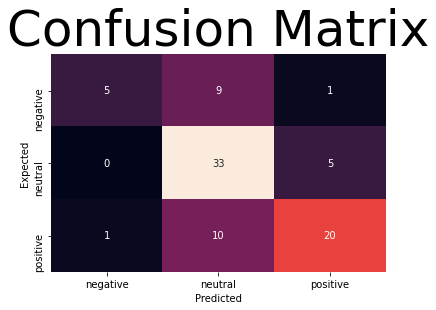

In [ ]:
confusion_matrix =  pd.crosstab(index=y_test, columns=sample_prediction.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 50)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, sample_prediction))

              precision    recall  f1-score   support

    negative       0.83      0.33      0.48        15
     neutral       0.63      0.87      0.73        38
    positive       0.77      0.65      0.70        31

    accuracy                           0.69        84
   macro avg       0.75      0.62      0.64        84
weighted avg       0.72      0.69      0.68        84

